**Desafío: Análisis bivariado del proyecto**

**Cristian Porras**

# Carga de Datos: League Of Legends e-sports leagues results

**Importar las librerías**

In [ ]:
!pip install pandas_profiling --upgrade

In [2]:
#Completar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [3]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

**Importar el archivo csv**

In [4]:
# Import PyDrive and associated libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '10dylUV4bNmJnMX6pYpTDZiyUgvFdmUkm'

downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('lol.csv')


In [5]:
df = pd.read_csv('lol.csv')
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,1,Blue,top,Khan,DWG KIA,Mordekaiser,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,7,1,3,23,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,20435.0,688.0471,0.276268,717.7441,933.9731,13.0,0.4377,5.0,0.1684,7.0,25.0,0.8418,12065,8154.0,274.5455,0.196019,10875.0,NaN,209.0,193.0,16.0,8.0,5.0,7.0370,3421.0,5043.0,73.0,2985.0,4493.0,72.0,436.0,550.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5407.0,7536.0,114.0,4659.0,7592.0,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,2,Blue,jng,Canyon,DWG KIA,Graves,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,7,1,5,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,13944.0,469.4949,0.188514,559.0909,400.5387,10.0,0.3367,14.0,0.4714,10.0,46.0,1.5488,13944,10033.0,337.8114,0.241189,13850.0,NaN,259.0,41.0,218.0,110.0,43.0,8.7205,3497.0,4314.0,87.0,3055.0,3059.0,62.0,442.0,1255.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,6974.0,8232.0,146.0,4854.0,4827.0,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,3,Blue,mid,ShowMaker,DWG KIA,Zoe,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,5,0,8,23,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16039.0,540.0337,0.216837,285.4545,282.6936,11.0,0.3704,8.0,0.2694,4.0,59.0,1.9865,14274,10363.0,348.9226,0.249122,12700.0,NaN,299.0,250.0,49.0,17.0,24.0,10.0673,3784.0,5171.0,114.0,3301.0,4822.0,91.0,483.0,349.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,6591.0,7827.0,158.0,5013.0,7473.0,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1,10.25,4,Blue,bot,Ghost,DWG KIA,Miss Fortune,Aatrox,Kai'Sa,Pantheon,Aphelios,Lucian,1782,1,3,2,11,23,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7744,0.9091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,17202.0,579.1919,0.232560,339.6296,291.8855,15.0,0.5051,5.0,0.1684,7.0,34.0,1.1448,13097,9186.0,309.2929,0.220828,11925.0,NaN,292.0,265.0,27.0,17.0,4.0,9.8316,3540.0,3354.0,94.0,3020.0,3053.0,75.0,520.0,301.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,5202.0,5053.0,1

In [6]:
df.shape

(138660, 119)

**Obtener la totalidad de registros por columnas**

In [7]:
df.count()

gameid                      138612
datacompleteness             96180
url                         138648
league                      138660
year                        138660
split                        92952
playoffs                    138660
date                        138660
game                        138660
patch                       138660
playerid                    138660
side                        138660
position                    138660
player                      115550
team                        138660
champion                    115550
ban1                        138270
ban2                        138390
ban3                        138108
ban4                        138264
ban5                        138000
gamelength                  138660
result                      138660
kills                       138660
deaths                      138660
assists                     138660
teamkills                   138660
teamdeaths                  138660
doublekills         

**Analisis del tipo de dato de cada columna**

In [8]:
df.dtypes

gameid                       object
datacompleteness             object
url                          object
league                       object
year                          int64
split                        object
playoffs                      int64
date                         object
game                          int64
patch                       float64
playerid                      int64
side                         object
position                     object
player                       object
team                         object
champion                     object
ban1                         object
ban2                         object
ban3                         object
ban4                         object
ban5                         object
gamelength                    int64
result                        int64
kills                         int64
deaths                        int64
assists                       int64
teamkills                     int64
teamdeaths                  

**Se decide usar solo las partidas de la liga LCK, al ser esta una liga de alto nivel y con numerosos registros**

In [9]:
df = df[df['league']=='LCK']

**Estadisticas por columnas**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5868.0,2021.000000,0.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
playoffs,5868.0,0.073620,0.261173,0.000000,0.000000,0.000000,0.000000,1.000000
game,5868.0,1.838446,0.809317,1.000000,1.000000,2.000000,2.000000,5.000000
patch,5868.0,11.083865,0.053297,11.010000,11.030000,11.110000,11.130000,11.160000
playerid,5868.0,29.583333,57.655380,1.000000,3.750000,6.500000,9.250000,200.000000
gamelength,5868.0,2007.190184,346.466961,1276.000000,1779.000000,1960.000000,2173.000000,4216.000000
result,5868.0,0.500000,0.500043,0.000000,0.000000,0.500000,1.000000,1.000000
kills,5868.0,4.013292,4.933493,0.000000,1.000000,2.000000,5.000000,32.000000
deaths,5868.0,4.022154,4.705058,0.000000,1.000000,3.000000,4.000000,32.000000
assists,5868.0,9.230061,11.105990,0.000000,3.000000,6.000000,10.000000,78.000000


Profiling del data frame

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [11]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

El reporte generado es muy pesado y Colab no lo está cargando, genero el archivo en HTML, lo descargo y presento más abajo algunos datos interesante

In [14]:
profile.to_file('profile_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

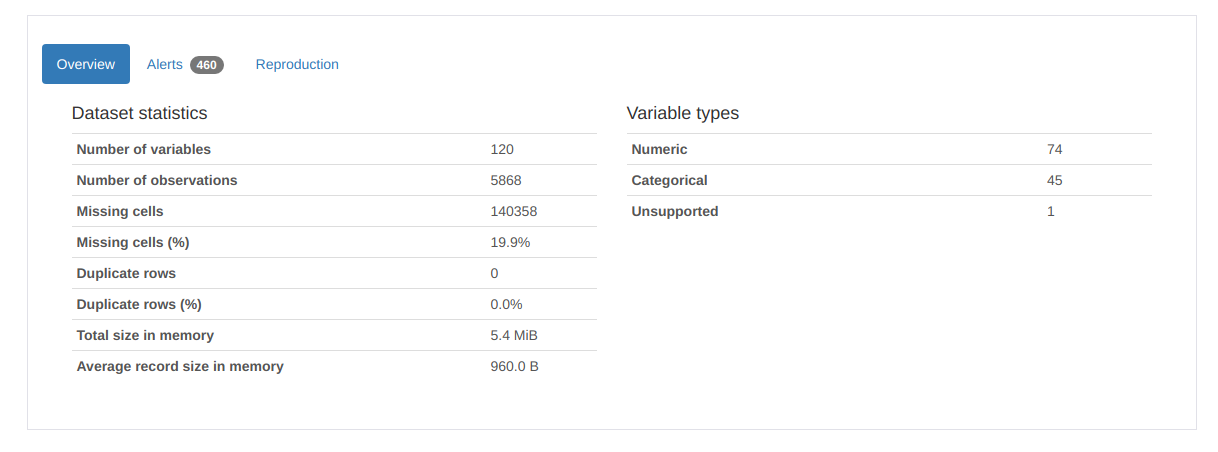

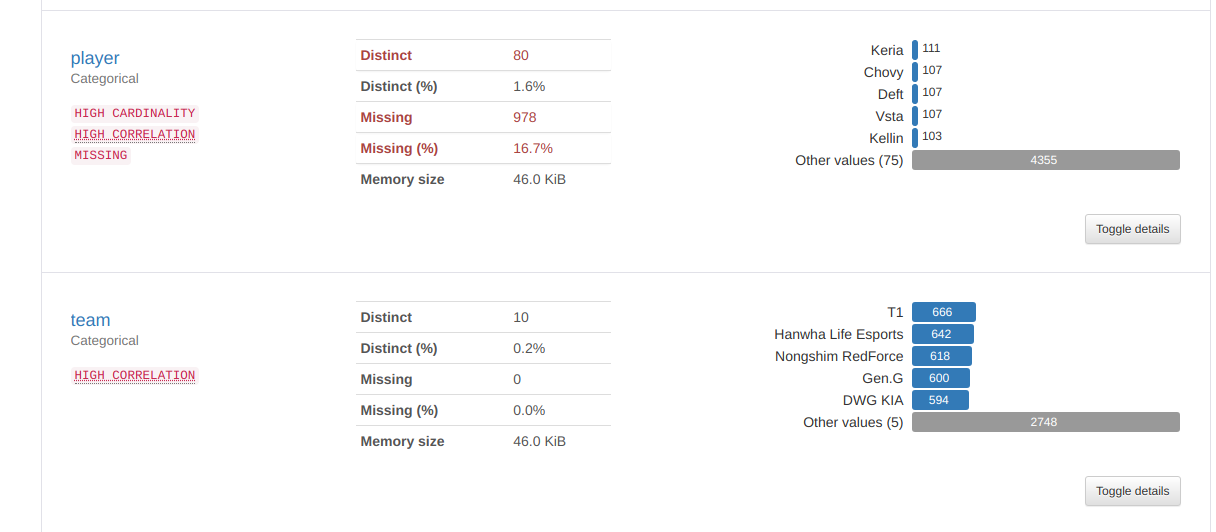

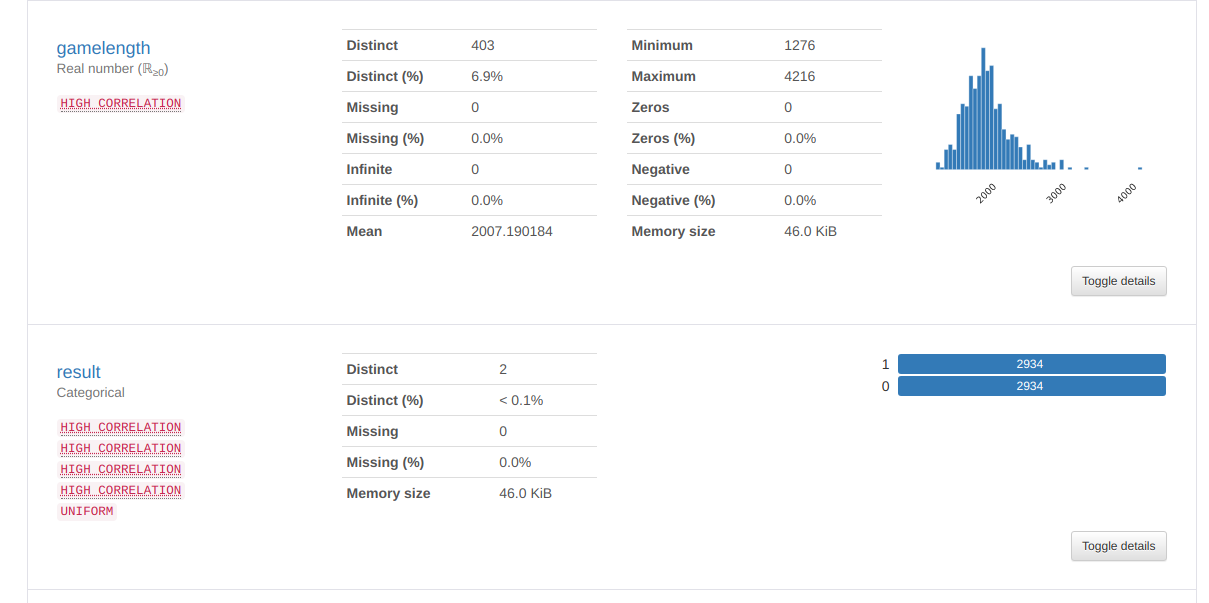

**Heat Map - Mapa de correlación**

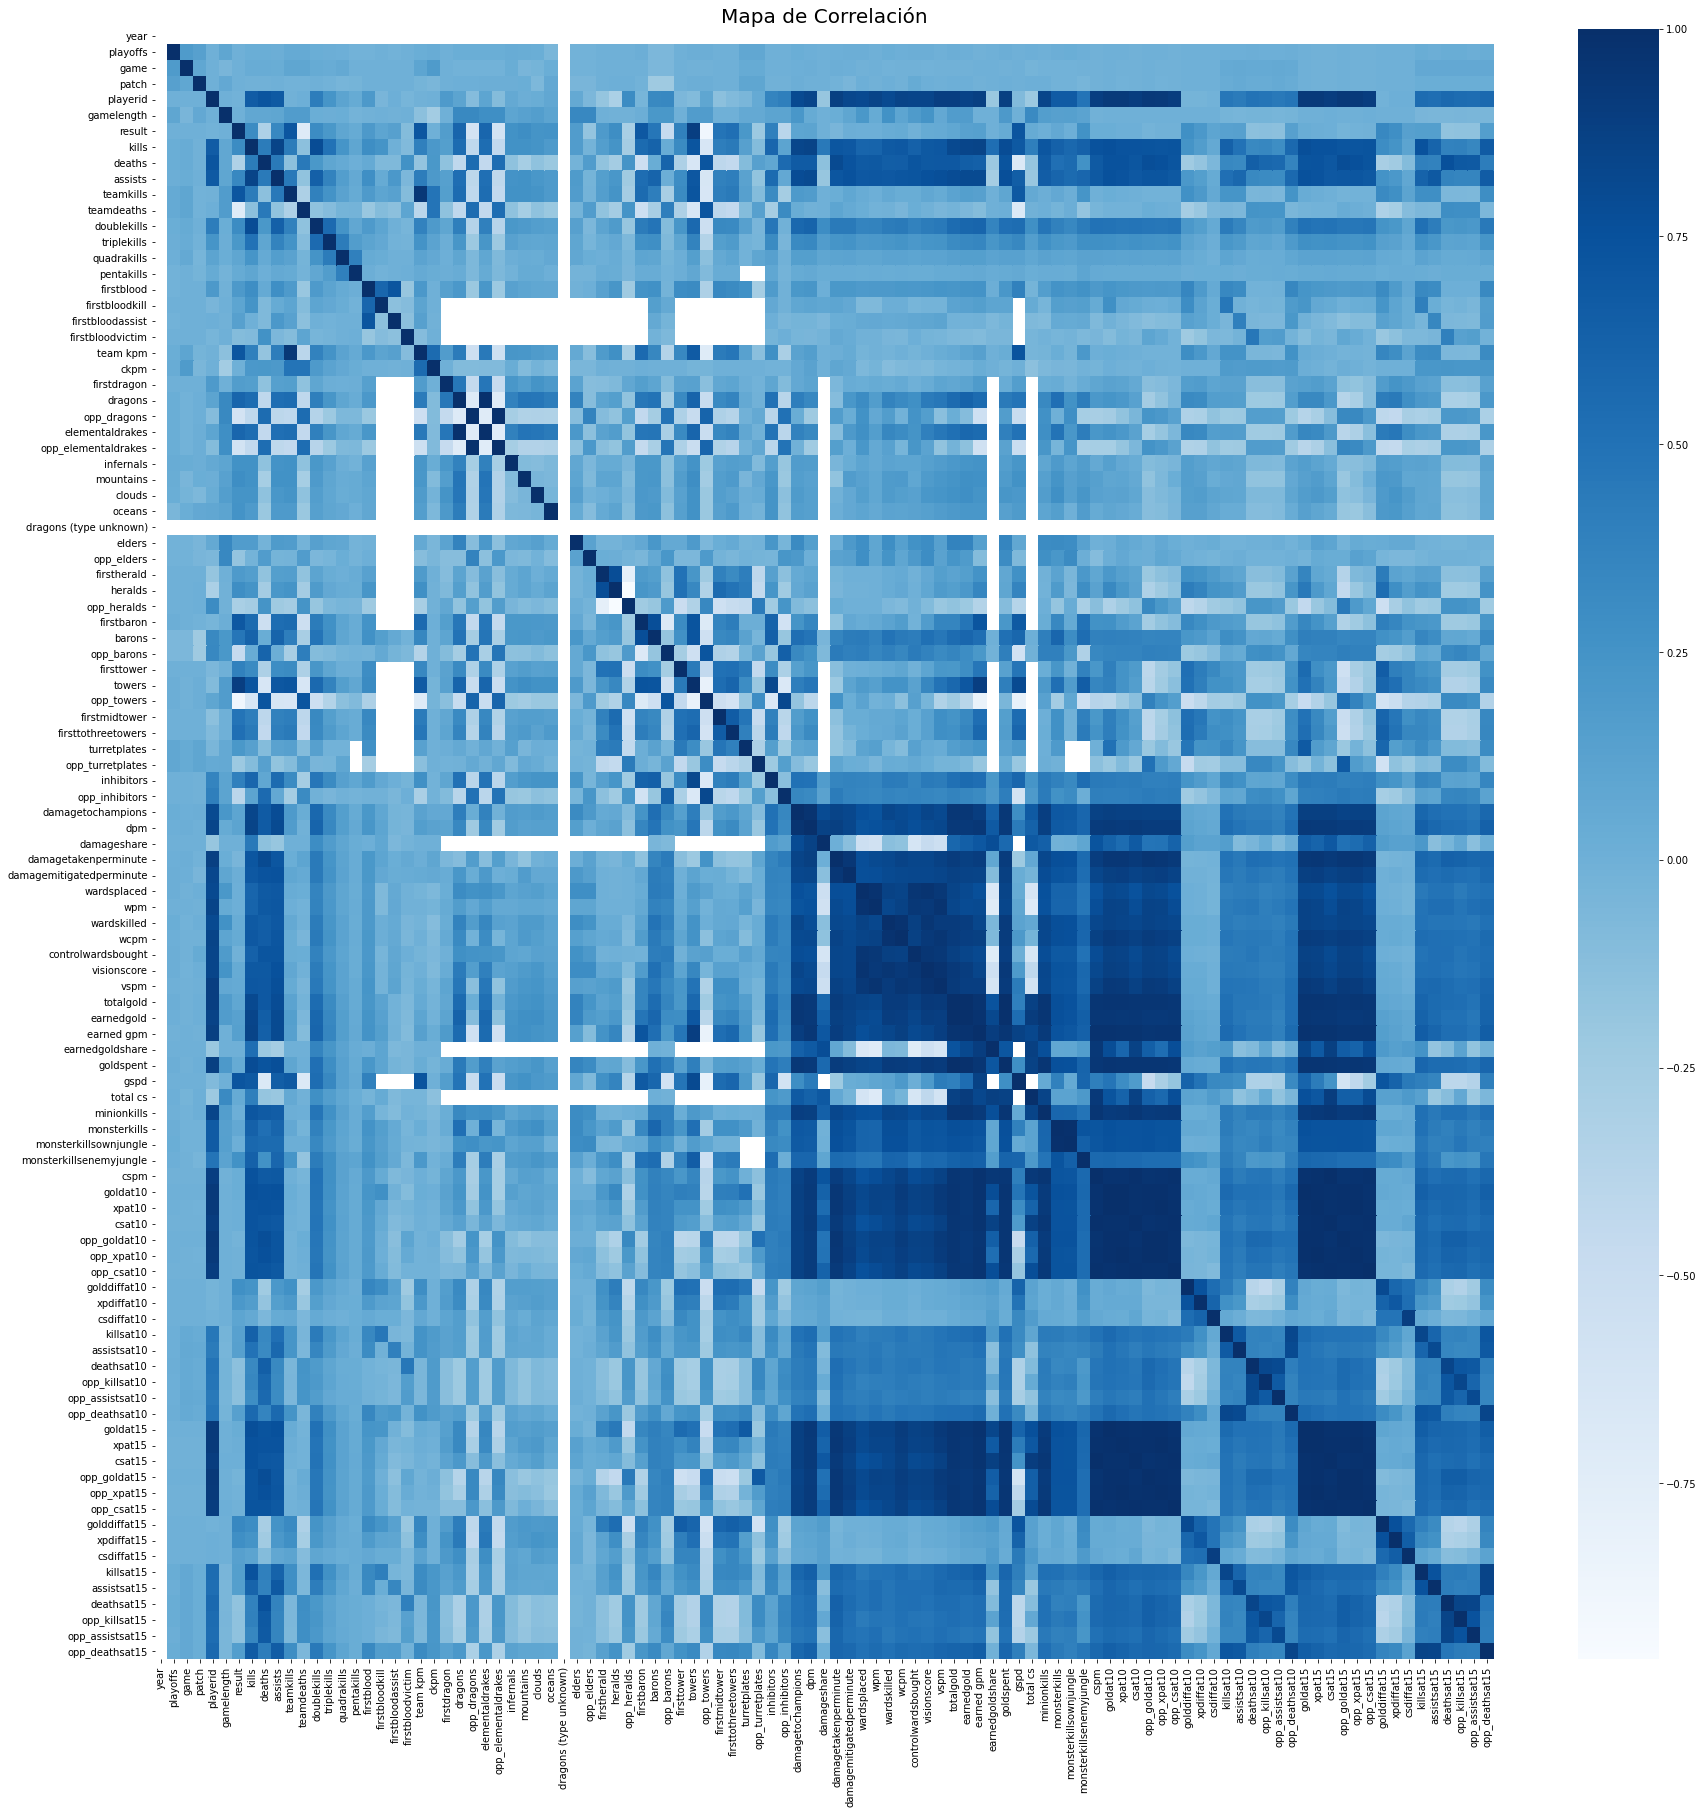

In [34]:
plt.figure(figsize=(30, 30))

sns.heatmap(df.corr(), annot = False, cmap = 'Blues')
plt.title('Mapa de Correlación', fontsize = 20)
plt.show()

In [24]:
%matplotlib inline
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

**Scatterplot result y teamkills**

Se espera una correlación lineal, a mayores kills se obtiene más ventaja en una partida. No nos dice mucho sin antes agrupar los datos

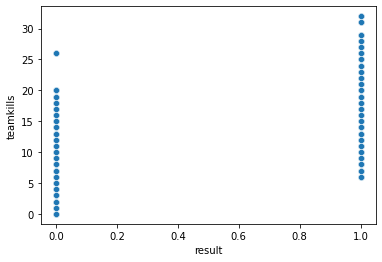

In [30]:
sns.scatterplot(data = df, x= 'result', y= 'teamkills')

In [ ]:
Media de resultado agrupado por asesinatos del equipo

In [28]:
df.groupby('teamkills').mean()['result']

teamkills
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.045455
7     0.106383
8     0.147541
9     0.288889
10    0.378378
11    0.450980
12    0.600000
13    0.581395
14    0.666667
15    0.860000
16    0.886364
17    0.840000
18    0.902439
19    0.951220
20    0.942857
21    1.000000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    0.833333
27    1.000000
28    1.000000
29    1.000000
31    1.000000
32    1.000000
Name: result, dtype: float64

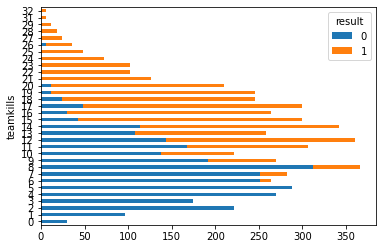

In [29]:
# lo podemos ver graficamente
pd.crosstab(df['teamkills'],df['result']).plot(kind='barh', stacked=True)

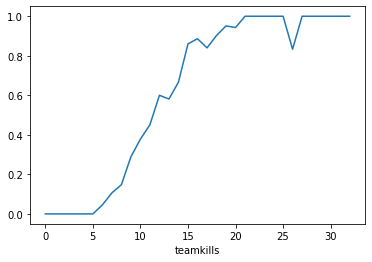

In [31]:
df.groupby('teamkills').mean()['result'].plot.line()

**Diferencia de Oro a los 10 minutos vs resultado de la partida**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


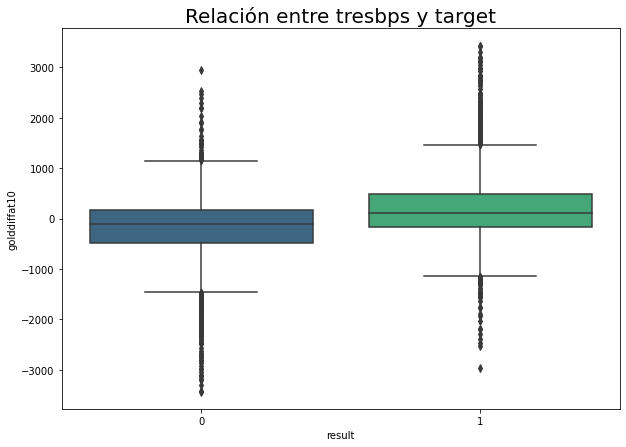

In [35]:
# golddiffat10 vs result
plt.figure(figsize=(10, 7))
sns.boxplot(df['result'], df['golddiffat10'], palette = 'viridis')
plt.title('Relación entre tresbps y target', fontsize = 20)
plt.show()